### data = Kaggle IEEE fraud, n = 10K

In [1]:
# print n unique vals for non-num cols
def col_types(df):
    for c in df.columns:
        if not np.issubdtype(df[c].dtype, np.number):
            print(c , ' NOT num...', df[c].nunique())
            if (df[c].nunique() <= 5):
                print(df[c].unique())
            print('')

In [2]:
%%time

import pandas as pd
import numpy as np

df = pd.read_csv('train_transaction.csv', low_memory=True)

CPU times: user 13 s, sys: 1.91 s, total: 14.9 s
Wall time: 17.9 s


### non-numeric types?

In [3]:
col_types(df)

ProductCD  NOT num... 5
['W' 'H' 'C' 'S' 'R']

card4  NOT num... 4
['discover' 'mastercard' 'visa' 'american express' nan]

card6  NOT num... 4
['credit' 'debit' nan 'debit or credit' 'charge card']

P_emaildomain  NOT num... 59

R_emaildomain  NOT num... 60

M1  NOT num... 2
['T' nan 'F']

M2  NOT num... 2
['T' nan 'F']

M3  NOT num... 2
['T' nan 'F']

M4  NOT num... 3
['M2' 'M0' nan 'M1']

M5  NOT num... 2
['F' 'T' nan]

M6  NOT num... 2
['T' 'F' nan]

M7  NOT num... 2
[nan 'F' 'T']

M8  NOT num... 2
[nan 'F' 'T']

M9  NOT num... 2
[nan 'F' 'T']



### convert booleans to integers

In [4]:
for i in range(1,10):
    df['M' + str(i)] = df['M' + str(i)].eq('T').mul(1)

In [5]:
col_types(df)

ProductCD  NOT num... 5
['W' 'H' 'C' 'S' 'R']

card4  NOT num... 4
['discover' 'mastercard' 'visa' 'american express' nan]

card6  NOT num... 4
['credit' 'debit' nan 'debit or credit' 'charge card']

P_emaildomain  NOT num... 59

R_emaildomain  NOT num... 60



### remove string columns with large n unique vals

In [6]:
df = df.drop(columns=['P_emaildomain', 'R_emaildomain'], axis=1)

In [7]:
col_types(df)

ProductCD  NOT num... 5
['W' 'H' 'C' 'S' 'R']

card4  NOT num... 4
['discover' 'mastercard' 'visa' 'american express' nan]

card6  NOT num... 4
['credit' 'debit' nan 'debit or credit' 'charge card']



### one hot encode

In [8]:
col_types(df)

ProductCD  NOT num... 5
['W' 'H' 'C' 'S' 'R']

card4  NOT num... 4
['discover' 'mastercard' 'visa' 'american express' nan]

card6  NOT num... 4
['credit' 'debit' nan 'debit or credit' 'charge card']



In [9]:
df = pd.concat([df, pd.get_dummies(df['ProductCD'], drop_first=True)], axis=1)
df = df.drop(columns=['ProductCD'], axis=1)

In [10]:
df = pd.concat([df, pd.get_dummies(df['card4'])], axis=1)
df = df.drop(columns=['card4'], axis=1)

In [11]:
df = pd.concat([df, pd.get_dummies(df['card6'])], axis=1)
df = df.drop(columns=['card6'], axis=1)

In [12]:
col_types(df)

### all numeric, now impute

In [13]:
df.describe()

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,...,S,W,american express,discover,mastercard,visa,charge card,credit,debit,debit or credit
count,5.905400e+05,590540.000000,5.905400e+05,590540.000000,590540.000000,581607.000000,588975.000000,586281.000000,524834.000000,524834.000000,...,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000
mean,3.282270e+06,0.034990,7.372311e+06,135.027176,9898.734658,362.555488,153.194925,199.278897,290.733794,86.800630,...,0.019690,0.744522,0.014102,0.011263,0.320414,0.651551,0.000025,0.252288,0.744976,0.000051
std,1.704744e+05,0.183755,4.617224e+06,239.162522,4901.170153,157.793246,11.336444,41.244453,101.741072,2.690623,...,0.138934,0.436130,0.117913,0.105526,0.466636,0.476479,0.005040,0.434326,0.435875,0.007127
min,2.987000e+06,0.000000,8.640000e+04,0.251000,1000.000000,100.000000,100.000000,100.000000,100.000000,10.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.134635e+06,0.000000,3.027058e+06,43.321000,6019.000000,214.000000,150.000000,166.000000,204.000000,87.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.282270e+06,0.000000,7.306528e+06,68.769000,9678.000000,361.000000,150.000000,226.000000,299.000000,87.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,3.429904e+06,0.000000,1.124662e+07,125.000000,14184.000000,512.000000,150.000000,226.000000,330.000000,87.000000,...,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000
max,3.577539e+06,1.000000,1.581113e+07,31937.391000,18396.000000,600.000000,231.000000,237.000000,540.000000,102.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
# impute with mean value
for c in df.columns:
    df[c] = df[c].fillna(df[c].mean())

In [15]:
# any missing values??
for c in df.columns:
    if df[c].isnull().sum() > 0:
        print(c + ' ' + str(df[c].isnull().sum()))

In [16]:
df.describe()

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,...,S,W,american express,discover,mastercard,visa,charge card,credit,debit,debit or credit
count,5.905400e+05,590540.000000,5.905400e+05,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,...,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000
mean,3.282270e+06,0.034990,7.372311e+06,135.027176,9898.734658,362.555488,153.194925,199.278897,290.733794,86.800630,...,0.019690,0.744522,0.014102,0.011263,0.320414,0.651551,0.000025,0.252288,0.744976,0.000051
std,1.704744e+05,0.183755,4.617224e+06,239.162522,4901.170153,156.595240,11.321413,41.095455,95.914128,2.536525,...,0.138934,0.436130,0.117913,0.105526,0.466636,0.476479,0.005040,0.434326,0.435875,0.007127
min,2.987000e+06,0.000000,8.640000e+04,0.251000,1000.000000,100.000000,100.000000,100.000000,100.000000,10.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.134635e+06,0.000000,3.027058e+06,43.321000,6019.000000,215.000000,150.000000,166.000000,205.000000,87.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.282270e+06,0.000000,7.306528e+06,68.769000,9678.000000,361.000000,150.000000,226.000000,290.733794,87.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,3.429904e+06,0.000000,1.124662e+07,125.000000,14184.000000,512.000000,150.000000,226.000000,327.000000,87.000000,...,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000
max,3.577539e+06,1.000000,1.581113e+07,31937.391000,18396.000000,600.000000,231.000000,237.000000,540.000000,102.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Random Forest Example

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [18]:
%%time
# SPLIT DATA FOR CROSS VALIDATION
y = df['isFraud']
X = df.drop(columns = ['isFraud'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

# INDUCE ALGORITHM w/ TRAINING DATA, GENERATE MODEL
clf = RandomForestClassifier(max_depth=5, n_estimators=50, random_state=0, n_jobs=12)
clf.fit(X_train, y_train)

CPU times: user 1min 36s, sys: 2.37 s, total: 1min 38s
Wall time: 12.9 s


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=12,
                       oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

### FEATURE IMPORTANCE

https://gist.github.com/WillKoehrsen/475f57ab3c61ea46db0833c6708f1702

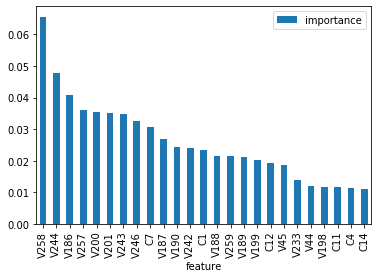

In [22]:
fi = pd.DataFrame({'feature': list(X.columns),
                   'importance': clf.feature_importances_}).sort_values('importance', ascending = False)

import matplotlib.pyplot as plt
fi.head(25).plot(x='feature', y='importance', kind='bar')
plt.show()

### test model

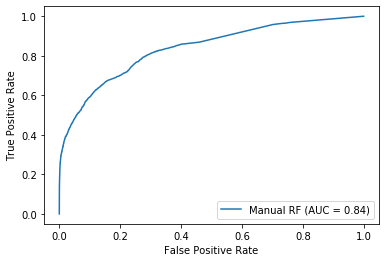

In [23]:
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from sklearn import metrics

auc = metrics.plot_roc_curve(clf, X_test, y_test, name='Manual RF')
plt.show()  

In [24]:
auc.roc_auc

0.8366191385684328

In [27]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, [y_hat[1] for y_hat in clf.predict_proba(X_test)], pos_label=1)

metrics.auc(fpr, tpr)

0.8366191385684328

# Random Forest with Optuna
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [28]:
import optuna

In [29]:
def rf_ojbective(trial):
    
    # Random Forest Params
    n_estimators = trial.suggest_int('n_estimators', 25, 250)
    criterion = trial.suggest_categorical('criterion', ['gini','entropy'])
    max_depth = trial.suggest_int('max_depth',1,20)
    min_samples_split = trial.suggest_int('min_samples_split',2,10)
    
    # Induction
    clf = RandomForestClassifier(
        n_estimators = n_estimators, 
        criterion = criterion,
        max_depth = max_depth, 
        min_samples_split = min_samples_split,
        n_jobs = 12,
        random_state = 0)
    clf.fit(X_train, y_train)
    
    # Test
    fpr, tpr, thresholds = metrics.roc_curve(y_test, [y_hat[1] for y_hat in clf.predict_proba(X_test)], pos_label=1)
    result = 1 - metrics.auc(fpr, tpr)
    return result

In [31]:
study = optuna.create_study()

In [33]:
%%time
study.optimize(rf_ojbective, n_trials=5, timeout=300)

[I 2020-01-20 14:59:17,420] Finished trial#0 resulted in value: 0.13286497280757037. Current best value is 0.13286497280757037 with parameters: {'n_estimators': 105, 'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 4}.
[I 2020-01-20 15:01:14,129] Finished trial#1 resulted in value: 0.07477944576724771. Current best value is 0.07477944576724771 with parameters: {'n_estimators': 210, 'criterion': 'entropy', 'max_depth': 20, 'min_samples_split': 5}.
[I 2020-01-20 15:01:32,519] Finished trial#2 resulted in value: 0.08775342728942337. Current best value is 0.07477944576724771 with parameters: {'n_estimators': 210, 'criterion': 'entropy', 'max_depth': 20, 'min_samples_split': 5}.
[I 2020-01-20 15:01:57,770] Finished trial#3 resulted in value: 0.1424677195784586. Current best value is 0.07477944576724771 with parameters: {'n_estimators': 210, 'criterion': 'entropy', 'max_depth': 20, 'min_samples_split': 5}.
[I 2020-01-20 15:02:26,415] Finished trial#4 resulted in value: 0.1246672598

CPU times: user 40min 26s, sys: 17.3 s, total: 40min 43s
Wall time: 3min 45s


In [37]:
df = study.trials_dataframe(attrs=('number', 'value', 'params', 'state'))
df

,number,value,params_criterion,params_max_depth,params_min_samples_split,params_n_estimators,state
0,0,0.132865,gini,10,4,105,COMPLETE
1,1,0.074779,entropy,20,5,210,COMPLETE
2,2,0.087753,entropy,17,7,34,COMPLETE
3,3,0.142468,entropy,6,5,114,COMPLETE
4,4,0.124667,entropy,9,3,88,COMPLETE


In [42]:
df.sort_values(by='value', ascending=True)

,number,value,params_criterion,params_max_depth,params_min_samples_split,params_n_estimators,state
1,1,0.074779,entropy,20,5,210,COMPLETE
2,2,0.087753,entropy,17,7,34,COMPLETE
4,4,0.124667,entropy,9,3,88,COMPLETE
0,0,0.132865,gini,10,4,105,COMPLETE
3,3,0.142468,entropy,6,5,114,COMPLETE


In [41]:
%%time
study.optimize(rf_ojbective, n_trials=5, timeout=300)

[I 2020-01-20 15:13:29,435] Finished trial#5 resulted in value: 0.11205610821731371. Current best value is 0.07477944576724771 with parameters: {'n_estimators': 210, 'criterion': 'entropy', 'max_depth': 20, 'min_samples_split': 5}.
[I 2020-01-20 15:13:34,968] Finished trial#6 resulted in value: 0.27654243918295596. Current best value is 0.07477944576724771 with parameters: {'n_estimators': 210, 'criterion': 'entropy', 'max_depth': 20, 'min_samples_split': 5}.
[I 2020-01-20 15:14:29,124] Finished trial#7 resulted in value: 0.14195069406741267. Current best value is 0.07477944576724771 with parameters: {'n_estimators': 210, 'criterion': 'entropy', 'max_depth': 20, 'min_samples_split': 5}.
[I 2020-01-20 15:15:14,553] Finished trial#8 resulted in value: 0.15916621537286446. Current best value is 0.07477944576724771 with parameters: {'n_estimators': 210, 'criterion': 'entropy', 'max_depth': 20, 'min_samples_split': 5}.
[I 2020-01-20 15:16:07,040] Finished trial#9 resulted in value: 0.147426

CPU times: user 42min 42s, sys: 22.2 s, total: 43min 5s
Wall time: 4min 3s


In [45]:
study.trials_dataframe(attrs=('number', 'value', 'params', 'state')).sort_values(by='value', ascending=True)

,number,value,params_criterion,params_max_depth,params_min_samples_split,params_n_estimators,state
1,1,0.074779,entropy,20,5,210,COMPLETE
2,2,0.087753,entropy,17,7,34,COMPLETE
5,5,0.112056,gini,15,5,168,COMPLETE
4,4,0.124667,entropy,9,3,88,COMPLETE
0,0,0.132865,gini,10,4,105,COMPLETE
7,7,0.141951,entropy,6,2,245,COMPLETE
3,3,0.142468,entropy,6,5,114,COMPLETE
9,9,0.147427,gini,7,6,209,COMPLETE
8,8,0.159166,gini,5,3,249,COMPLETE
6,6,0.276542,entropy,1,10,82,COMPLETE


In [46]:
%%time
study.optimize(rf_ojbective, n_trials=5, timeout=300)
study.trials_dataframe(attrs=('number', 'value', 'params', 'state')).sort_values(by='value', ascending=True)

[I 2020-01-20 15:18:39,544] Finished trial#10 resulted in value: 0.07608278724040507. Current best value is 0.07477944576724771 with parameters: {'n_estimators': 210, 'criterion': 'entropy', 'max_depth': 20, 'min_samples_split': 5}.
[I 2020-01-20 15:20:26,478] Finished trial#11 resulted in value: 0.0761645079033263. Current best value is 0.07477944576724771 with parameters: {'n_estimators': 210, 'criterion': 'entropy', 'max_depth': 20, 'min_samples_split': 5}.
[I 2020-01-20 15:22:32,937] Finished trial#12 resulted in value: 0.07593620071496165. Current best value is 0.07477944576724771 with parameters: {'n_estimators': 210, 'criterion': 'entropy', 'max_depth': 20, 'min_samples_split': 5}.


CPU times: user 1h 2min 23s, sys: 20.3 s, total: 1h 2min 43s
Wall time: 5min 37s


,number,value,params_criterion,params_max_depth,params_min_samples_split,params_n_estimators,state
1,1,0.074779,entropy,20,5,210,COMPLETE
12,12,0.075936,entropy,20,9,214,COMPLETE
10,10,0.076083,entropy,20,8,187,COMPLETE
11,11,0.076165,entropy,20,8,183,COMPLETE
2,2,0.087753,entropy,17,7,34,COMPLETE
5,5,0.112056,gini,15,5,168,COMPLETE
4,4,0.124667,entropy,9,3,88,COMPLETE
0,0,0.132865,gini,10,4,105,COMPLETE
7,7,0.141951,entropy,6,2,245,COMPLETE
3,3,0.142468,entropy,6,5,114,COMPLETE


In [49]:
%%time
study.optimize(rf_ojbective, n_trials=5, timeout=300)
study.trials_dataframe(attrs=('number', 'value', 'params', 'state')).sort_values(by='value', ascending=True)

[I 2020-01-20 15:40:12,018] Finished trial#13 resulted in value: 0.09244877119787431. Current best value is 0.07477944576724771 with parameters: {'n_estimators': 210, 'criterion': 'entropy', 'max_depth': 20, 'min_samples_split': 5}.
[I 2020-01-20 15:41:42,687] Finished trial#14 resulted in value: 0.08156854902848687. Current best value is 0.07477944576724771 with parameters: {'n_estimators': 210, 'criterion': 'entropy', 'max_depth': 20, 'min_samples_split': 5}.
[I 2020-01-20 15:43:27,525] Finished trial#15 resulted in value: 0.09948052217844128. Current best value is 0.07477944576724771 with parameters: {'n_estimators': 210, 'criterion': 'entropy', 'max_depth': 20, 'min_samples_split': 5}.


CPU times: user 49min 49s, sys: 26.5 s, total: 50min 15s
Wall time: 5min 6s


,number,value,params_criterion,params_max_depth,params_min_samples_split,params_n_estimators,state
1,1,0.074779,entropy,20,5,210,COMPLETE
12,12,0.075936,entropy,20,9,214,COMPLETE
10,10,0.076083,entropy,20,8,187,COMPLETE
11,11,0.076165,entropy,20,8,183,COMPLETE
14,14,0.081569,entropy,18,9,145,COMPLETE
2,2,0.087753,entropy,17,7,34,COMPLETE
13,13,0.092449,entropy,15,10,223,COMPLETE
15,15,0.099481,entropy,13,6,221,COMPLETE
5,5,0.112056,gini,15,5,168,COMPLETE
4,4,0.124667,entropy,9,3,88,COMPLETE


In [50]:
study.trials_dataframe(attrs=('number', 'value', 'params', 'state')).sort_values(by='number', ascending=True)

,number,value,params_criterion,params_max_depth,params_min_samples_split,params_n_estimators,state
0,0,0.132865,gini,10,4,105,COMPLETE
1,1,0.074779,entropy,20,5,210,COMPLETE
2,2,0.087753,entropy,17,7,34,COMPLETE
3,3,0.142468,entropy,6,5,114,COMPLETE
4,4,0.124667,entropy,9,3,88,COMPLETE
5,5,0.112056,gini,15,5,168,COMPLETE
6,6,0.276542,entropy,1,10,82,COMPLETE
7,7,0.141951,entropy,6,2,245,COMPLETE
8,8,0.159166,gini,5,3,249,COMPLETE
9,9,0.147427,gini,7,6,209,COMPLETE
